4431872/4422102 [==============================] - 1s 0us/step


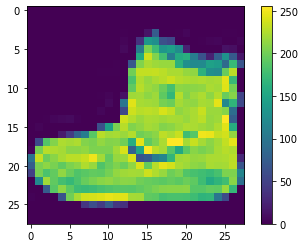

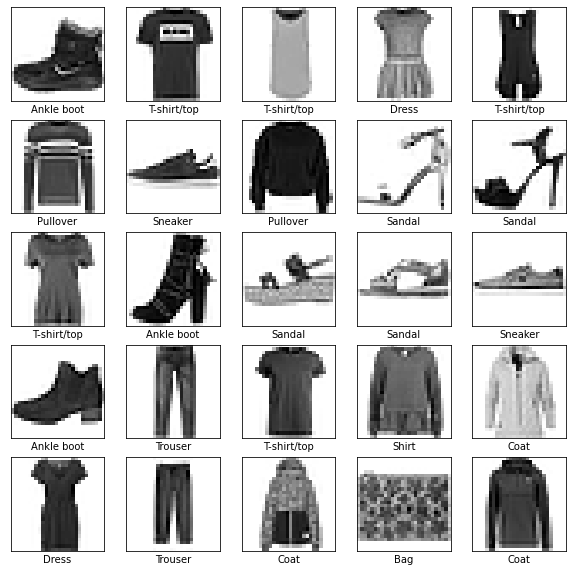

Epoch 1/5
1875/1875 [==============================] - 4s 1ms/step - loss: 1.7120 - accuracy: 0.7571
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6737 - accuracy: 0.7897
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6668 - accuracy: 0.7953
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6601 - accuracy: 0.8019
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6554 - accuracy: 0.8059
313/313 - 0s - loss: 1.6736 - accuracy: 0.7868 - 362ms/epoch - 1ms/step
test accuracy 0.7868000268936157 loss 1.6736249923706055
[7.1163960e-12 5.5120669e-14 2.4751535e-12 1.4319122e-10 8.2547505e-13
 2.6236563e-05 7.5085532e-10 2.2947197e-03 4.8751475e-10 9.9767905e-01] 9 9


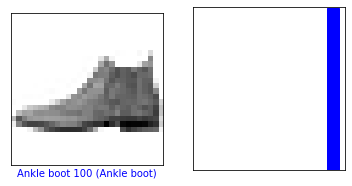

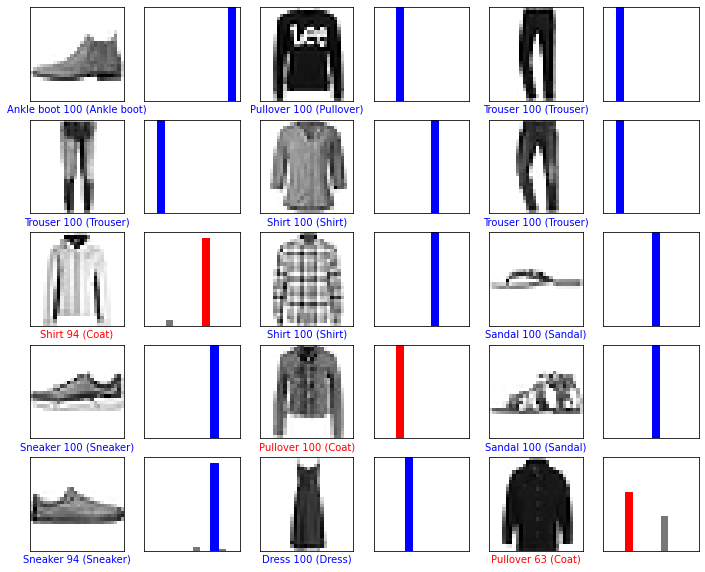

In [2]:
# environment-tf-cv-20220107 环境测试

from __future__ import absolute_import, division, print_function, unicode_literals

# 导入TensorFlow和tf.keras
import tensorflow as tf
from tensorflow import keras

# 导入辅助库
import numpy as np
import matplotlib.pyplot as plt

import sys


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 显示一张图片
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#处理图片数据
train_images = train_images / 255.0

test_images = test_images / 255.0
# 显示图片和名称
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # plt.colorbar()
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 配置模型层
model=keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128,activation=tf.nn.relu),
  keras.layers.Dense(10,activation=tf.nn.softmax)
])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=[tf.keras.metrics.Accuracy()])
              # loss='spares_categorical_crossentropy',
              # metrics=['accuraty'])
model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


model.fit(train_images,train_labels,epochs=5)
# test_loss, test_acc=model.evaluste(test_images,test.labels)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('test accuracy',test_acc,"loss",test_loss)#测试数据精度低于训练精度说明过拟合

# 进行预测
predictions = model.predict(test_images[:15])
print(predictions[0],np.argmax(predictions[0]),test_labels[0])

# 图表显示
def plot_image(i,predictions_array,true_label,img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f} ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                              color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()